# Bank Customer Churn Model

**Objective :**

objective is to find out if the customers have left the bank that is churned or not .Here we are going to predict if a customer has churned like left the bank or not


Data Source : https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv

# Import Libraries

In [20]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [21]:
#import the dataset
df=pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
#Here we have two categorical values in gender and churn so we need to set our customer id as index for that check if customer_id is duplicate or not
df.duplicated('CustomerId').sum()

0

In [23]:
df=df.set_index('CustomerId')
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding
we will replace all categorical columns like  gender and geography with values


In [25]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [26]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace = True)

In [27]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [28]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [29]:
df.head(100)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,0,1,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,2,1,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,2,1,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,0,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15699461,Fiorentini,515,0,0,35,10,176273.95,1,0,1,121277.78,0
15738721,Graham,773,0,0,41,9,102827.44,1,0,1,64595.25,0
15693683,Yuille,814,1,0,29,8,97086.40,2,1,1,197276.13,0


In [30]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [31]:
df.replace({'Num of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [32]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [33]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [35]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

<Axes: >

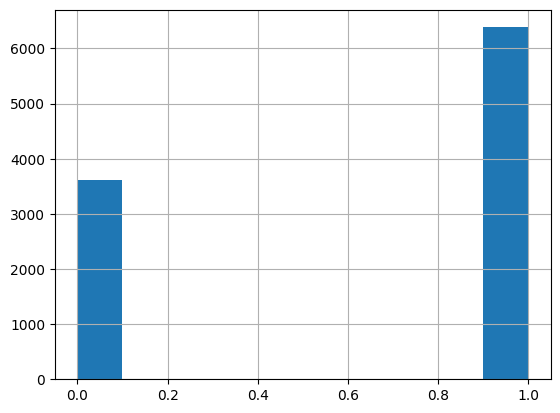

In [39]:
df['Zero_balance'] = np.where(df['Balance']>0,1,0)
df['Zero_balance'].hist()

In [40]:
#define labels and features
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero_balance'],
      dtype='object')

In [41]:
#here surname has no impact on the churn so we can drop it
X=df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary',  'Zero_balance']]


In [42]:
y=df['Churn']

In [83]:
y.shape

(10000,)

In [44]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

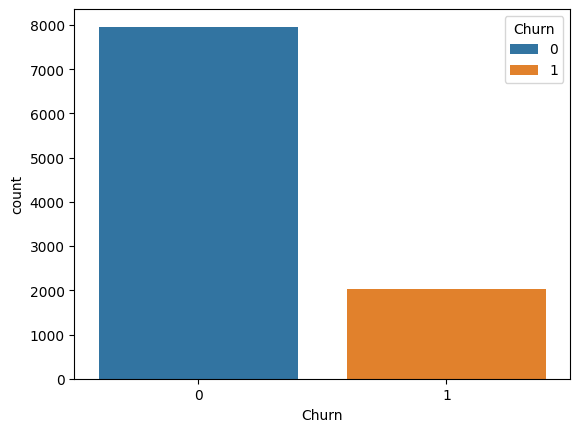

In [46]:
sns.countplot(data=df,x='Churn',hue='Churn')

Random under sampling


In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
rus=RandomUnderSampler(random_state=2529)

In [49]:
X_rus,y_rus=rus.fit_resample(X,y)

In [50]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [51]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

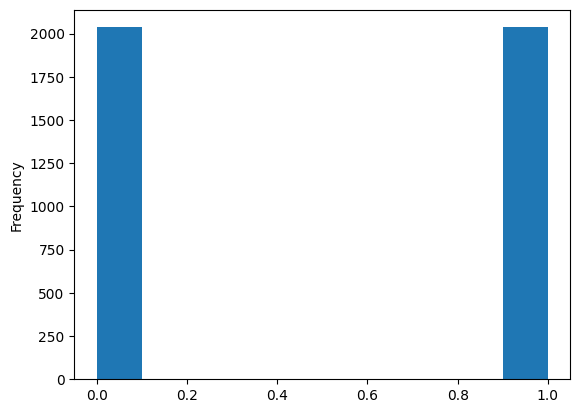

In [52]:
y_rus.plot(kind='hist')

Random over sampling


In [54]:
from imblearn.over_sampling import RandomOverSampler

In [55]:
ros=RandomOverSampler(random_state=2529)

In [56]:
X_ros,y_ros=ros.fit_resample(X,y)

In [57]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [59]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

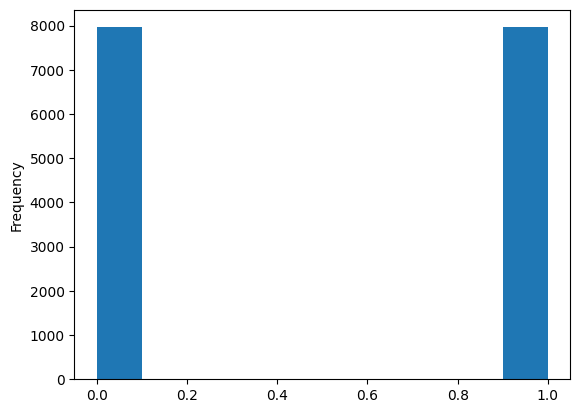

In [58]:
y_ros.plot(kind='hist')

Train test split


In [60]:
from sklearn.model_selection import train_test_split

In [82]:
#split original data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)

In [81]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3000, 11), (7000, 11), (3000,), (7000,))

In [62]:
#split random under sampled data
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,test_size=0.3,random_state=2529)

In [63]:
#split random over sampled data
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.3,random_state=2529)

Standardize Features

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

Standardize original data set

In [68]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]=sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [69]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]=sc.transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

Standardize Random under sampled data

In [97]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [66]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

Standardize over sampled data set

In [70]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [71]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

Support Vector Machine Classifier

In [72]:
from sklearn.svm import SVC
svc=SVC()

In [73]:
svc.fit(X_train,y_train)


SVC()

In [85]:
y_pred=svc.predict(X_test)

From random under sampled data

In [84]:
svc.fit(X_train_rus,y_train_rus)

SVC()

In [86]:
y_pred_rus=svc.predict(X_test_rus)

In [88]:
y_pred_rus

array([0, 0, 1, ..., 0, 1, 0])

For Random Over sampled

In [106]:
svc.fit(X_train_ros,y_train_ros)

SVC()

In [107]:
y_pred_ros=svc.predict(X_test_ros)

Model Accuracy

In [91]:
from sklearn.metrics import confusion_matrix,classification_report

In [89]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[487, 140],
       [180, 416]])

In [92]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.70      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



For over sampled data

In [108]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1931,  448],
       [ 614, 1785]])

In [109]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2379
           1       0.80      0.74      0.77      2399

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



Hyperparameter Tunning

In [95]:
from sklearn.model_selection import GridSearchCV

In [93]:
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']
            }

In [98]:
grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [100]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.1)


In [101]:
grid_prediction_rus=grid_rus.predict(X_test_rus)

In [102]:
confusion_matrix(y_test_rus,grid_prediction_rus)

array([[489, 138],
       [162, 434]])

In [105]:
print(classification_report(y_test_rus,grid_prediction_rus))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       627
           1       0.76      0.73      0.74       596

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



For over sampled

In [111]:
param_grid={'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']
            }

In [112]:
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  10.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [113]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [114]:
grid_prediction_ros=grid_rus.predict(X_test_ros)

In [115]:
confusion_matrix(y_test_ros,grid_prediction_ros)

array([[1901,  478],
       [ 502, 1897]])

In [118]:
print(classification_report(y_test_ros,grid_prediction_ros))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2379
           1       0.80      0.79      0.79      2399

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778

